In [1]:
import requests 
from bs4 import BeautifulSoup as soup
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
FONT_SIZE = 18
plt.rcParams['figure.figsize'] = (20,8)
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = FONT_SIZE
plt.rcParams['legend.fontsize'] = FONT_SIZE
plt.rcParams['xtick.labelsize'] = FONT_SIZE
plt.rcParams['ytick.labelsize'] = FONT_SIZE
%config InlineBackend.figure_format ='retina'

In [2]:
AMPERURL = r'https://www.amper.org.ro/sesizari/'
HEADERS = {"user-agent": "@WSzP's Problema-ML miner"}
DATA_CSV_PATH = r'./Data/amper.csv'

In [3]:
def crawl(url,headers):
    res = requests.get(url, headers=headers) 
    print(res.headers)
    print(f"Content-Type: {res.headers['Content-Type']}")
    print(f"Encoding: {res.encoding}")
    return res.text

In [4]:
amper = crawl(AMPERURL,HEADERS)

{'Date': 'Mon, 25 May 2020 19:31:47 GMT', 'Server': 'Apache', 'X-Frame-Options': 'SAMEORIGIN', 'X-Pingback': 'https://www.amper.org.ro/sesizari/xmlrpc.php', 'Link': '<https://www.amper.org.ro/sesizari/wp-json/>; rel="https://api.w.org/", <https://www.amper.org.ro/sesizari/>; rel=shortlink', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/html; charset=UTF-8'}
Content-Type: text/html; charset=UTF-8
Encoding: UTF-8


In [5]:
page_soup = soup(amper, 'html.parser')
data = page_soup.select("[type='text/javascript']")[8].string.strip()
data[:500]

'/* <![CDATA[ */\nvar theme_data = {"url":"https:\\/\\/www.amper.org.ro\\/sesizari\\/wp-content\\/themes\\/sesizari","error_message":"V\\u0103 rug\\u0103m s\\u0103 introduce\\u021bi un fi\\u0219ier valid. (jpg, png, pdf)"};\nvar map_location = {"pins":[{"title":"Suceava, T\\u00e2rgu Mure\\u0219, judetul: Mures","description":"Ambele trotuare ale strazii Suceava, in apropierea Cimitirului evreiesc sunt ocupate de Masinile firmei de inchirieri MF rent a car. Uneori are 15 masini parcate. Oare pl\\u0103te\\u0219te i'

In [6]:
map_location_regex = r'^.*map\_location.*$'
map_location_json = re.findall(map_location_regex, data, re.MULTILINE)
map_location_json = map_location_json[0][27:-2]
print(map_location_json[:500])
print('...')
print(map_location_json[-500:])

[{"title":"Suceava, T\u00e2rgu Mure\u0219, judetul: Mures","description":"Ambele trotuare ale strazii Suceava, in apropierea Cimitirului evreiesc sunt ocupate de Masinile firmei de inchirieri MF rent a car. Uneori are 15 masini parcate. Oare pl\u0103te\u0219te impozite pentru fiecare loc de parcare ?","url":"https:\/\/www.amper.org.ro\/sesizari\/sesizare\/suceava-targu-mures-mures\/","address":"Romania, Mures, T\u00e2rgu Mure\u0219, Suceava","coordinates":"46.5318219, 24.5605755","status_value":
...
811798096","status_value":"pending","status_label":"In curs de rezolvare","category":46},{"title":"Strada Recoltei 7, Targu-Mures, judetul: Mures","description":"Groapa extraordinar de mare la trecerea caii ferate.","url":"https:\/\/www.amper.org.ro\/sesizari\/sesizare\/strada-recoltei-7-targu-mures-mures\/","address":"Romania, Mures, Targu-Mures, Strada Recoltei 7","coordinates":"46.51812263151161, 24.52126979827881","status_value":"pending","status_label":"In curs de rezolvare","category"

In [7]:
map_loc = json.loads(map_location_json)
map_loc[0]

{'title': 'Suceava, Târgu Mureș, judetul: Mures',
 'description': 'Ambele trotuare ale strazii Suceava, in apropierea Cimitirului evreiesc sunt ocupate de Masinile firmei de inchirieri MF rent a car. Uneori are 15 masini parcate. Oare plătește impozite pentru fiecare loc de parcare ?',
 'url': 'https://www.amper.org.ro/sesizari/sesizare/suceava-targu-mures-mures/',
 'address': 'Romania, Mures, Târgu Mureș, Suceava',
 'coordinates': '46.5318219, 24.5605755',
 'status_value': 'pending',
 'status_label': 'In curs de rezolvare',
 'category': 57}

In [8]:
numIssues = len(map_loc)
print(f'Number of issues on AMPER: {numIssues}')

Number of issues on AMPER: 763


In [12]:
issues = []
for issue in map_loc:
    issues.append([issue['category'], issue['title'], issue['description'], issue['address'], issue['coordinates'], issue['status_value'],issue['status_label'], issue['url']])  

df =  pd.DataFrame(issues, columns=['Category_ID','Title','Description','Address','Coordinates','Status_value','Status_label','Url'])
df

,Category_ID,Title,Description,Address,Coordinates,Status_value,Status_label,Url
0,57,"Suceava, Târgu Mureș, judetul: Mures","Ambele trotuare ale strazii Suceava, in apropi...","Romania, Mures, Târgu Mureș, Suceava","46.5318219, 24.5605755",pending,In curs de rezolvare,https://www.amper.org.ro/sesizari/sesizare/suc...
1,57,"Suceava, Târgu Mureș, judetul: Mures","autoturism ms 13 gjo abandonat, vizavi de Cimi...","Romania, Mures, Târgu Mureș, Suceava","46.5318219, 24.5605755",pending,In curs de rezolvare,https://www.amper.org.ro/sesizari/sesizare/suc...
2,44,"Pasajul Mimozelor Nr 1, Târgu Mureș, judetul: ...",Am dori sa vedem daca exista posibilitatea pen...,"Romania, Mures, Târgu Mureș, Pasajul Mimozelor...","46.53847314771793, 24.56418514251709",pending,In curs de rezolvare,https://www.amper.org.ro/sesizari/sesizare/pas...
3,44,"Secuilor Martiri &#8211; scurgerea apei, Târgu...",A víz forráshoz is kell utcai lámpa. A parkban...,"Romania, Mures, Târgu Mureș, Secuilor Martiri ...","46.556504, 24.5761983",pending,In curs de rezolvare,https://www.amper.org.ro/sesizari/sesizare/sec...
4,44,"Intre Movile, Târgu Mureș, judetul: Mures",Drum neasfaltat cu gropi mari!,"Romania, Mures, Târgu Mureș, Intre Movile","46.538112, 24.6072183",pending,In curs de rezolvare,https://www.amper.org.ro/sesizari/sesizare/int...
...,...,...,...,...,...,...,...,...
758,56,"Aleea Carpați 21, Targu-Mures, judetul: Mures",Portiune lipsa in trecerea caii ferate din ale...,"Romania, Mures, Targu-Mures, Aleea Carpați 21","46.553327087591285, 24.55823063850403",complete,Rezolvat,https://www.amper.org.ro/sesizari/sesizare/ale...
759,56,"Strada Secerei 22, Targu-Mures, judetul: Mures",Pod surpat!,"Romania, Mures, Targu-Mures, Strada Secerei 22","46.536701914998574, 24.571722149848938",complete,Rezolvat,https://www.amper.org.ro/sesizari/sesizare/str...
760,56,"Strada Somnului 1, Targu-Mures, judetul: Mures",Gropi si denivelari imense imediat cum treci c...,"Romania, Mures, Targu-Mures, Strada Somnului 1","46.54757194493636, 24.54906553030014",pending,In curs de rezolvare,https://www.amper.org.ro/sesizari/sesizare/str...
761,46,"Strada Şurianu 8, Targu-Mures, judetul: Mures",Curtea Scolii 17 arata groaznic dupa ploaie.,"Romania, Mures, Targu-Mures, Strada Şurianu 8","46.53108524920353, 24.560043811798096",pending,In curs de rezolvare,https://www.amper.org.ro/sesizari/sesizare/str...


In [10]:
df.to_csv(DATA_CSV_PATH)

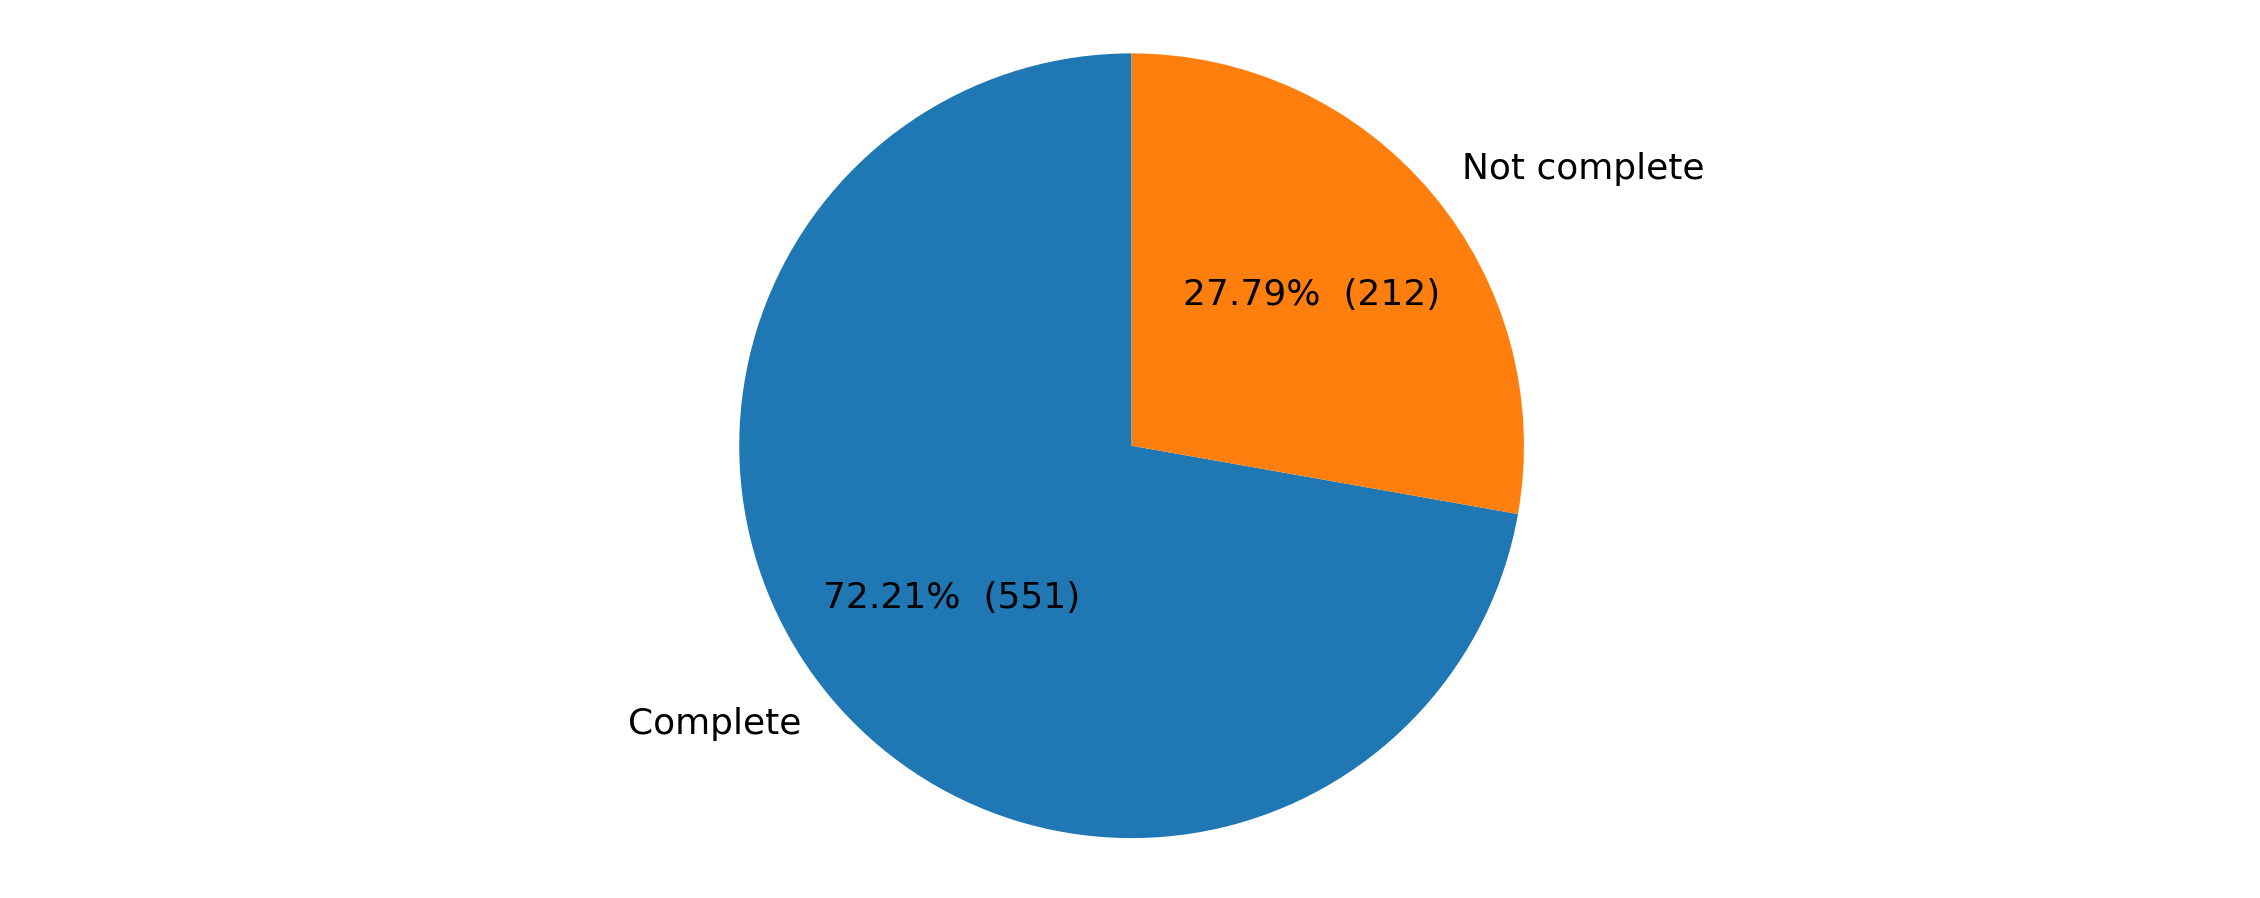

In [11]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

complete_labels = 'Complete', 'Not complete'
complete = [len(df[df.Status_value=='complete']),len(df[df.Status_value!='complete'])]
fig1, ax1 = plt.subplots()
ax1.pie(complete, labels=complete_labels, autopct=make_autopct(complete),
        shadow=False, startangle=90)
ax1.axis('equal') 
fig1.patch.set_facecolor('white')
plt.show()